# Analysing the AirBnB market in Athens
---

>Full name: Gaganis Michail <br/>
>Student ID: 8200234 <br/>
>Athens University of Economics and Business <br/>
>Contact: t8200234@aueb.gr

## Introduction

* This notebook was created for the class *Applied Machine Learning* taught by mr. Panos Louridas in the Athens University of Economics and Business. 
* The questions that are answered in thin notebook can be found [here](./airbnb.ipynb).
* The analysis is done with the data provided by InsideAirbnb, in the city of Athens.
* This notebook was created on October 2023. 

## Setting up our enviroment

* It's a good idea to keep our imports and settings organised in one place so that we can change them at any time without having to look them up.


In [2]:
#imports
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import numpy as np
from ipywidgets import interact
import folium
import matplotlib.dates as mdates
from folium.plugins import MarkerCluster

## Getting familiar with our data

* For the purposes of this project we will used data kindly provided to us by [InsideAirbnb](http://insideairbnb.com/), more specificaly [this page](http://insideairbnb.com/get-the-data) (data may or may not be available, this Notebook was written October of 2023).

* We can quickly figure out that for each city, there are 6 files of data provided. We should first take a look inside to figure out what we're dealing with.<br/>
* We will use [pandas](https://pandas.pydata.org/) dataframes for analysis in this notebook, so first we should import the module and load the `listings.csv` file.<br/>



In [3]:
listings = pd.read_csv('airbnb_data/listings.csv')
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,144,1,42,2023-09-10,0.28,7,359,8,00000957568
1,10990,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,70,1,66,2023-07-01,0.49,7,74,3,00001070920
2,10993,Rental unit in Athens · ★4.84 · Studio · 2 bed...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,85,1,92,2023-07-07,0.69,7,52,5,00000957080
3,10995,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,60,1,30,2023-06-02,0.19,7,73,1,00000957422
4,27262,Rental unit in Athens · ★4.81 · 1 bedroom · 1 ...,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,85,1,21,2023-06-02,0.16,7,90,2,00000957579


## Neighbourhood Listings in Descending Order

> Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

* By popularity we refer to the number of listings in a certain neighborhood. I.e, the more listings a neighborhood has, the more popular it is.

* Before looking into the number of listings per neighborhood we should check whether our data is appropriated to use for analysis.

* On this specific case, we only mean to count the listings per neighborhood. So at the moment we only need to check the particular column. 

In [4]:
listings['neighbourhood'].isnull().values.any()

False

* Since the subset of data needed seems to be in order (no NaN values) we can go ahead and use it to answer our questions.

* Lets take a look at our neighborhoods, as well as their number.

In [5]:
listings['neighbourhood'].unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΚΕΡΑΜΕΙΚΟΣ',
       'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΣΤΑΔΙΟ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',
       'ΝΕΑ ΚΥΨΕΛΗ', 'ΚΟΛΩΝΑΚΙ', 'ΠΑΓΚΡΑΤΙ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΑΚΡΟΠΟΛΗ', 'ΠΑΤΗΣΙΑ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΠΕΤΡΑΛΩΝΑ',
       'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΘΗΣΕΙΟ',
       'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΙΛΙΣΙΑ', 'ΚΥΨΕΛΗ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΓΟΥΒΑ', '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΠΡΟΜΠΟΝΑ', 'ΓΟΥΔΙ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΚΟΛΩΝΟΣ',
       'ΖΑΠΠΕΙΟ', 'ΣΕΠΟΛΙΑ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΥΖΗ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ',
       'ΠΕΝΤΑΓΩΝΟ', 'ΠΟΛΥΓΩΝΟ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΕΛΛΗΝΟΡΩΣΩΝ',
       'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΙΖΟΥΠΟΛΗ', 'ΡΗΓΙΛΛΗΣ'], dtype=object)

In [6]:
listings['neighbourhood'].nunique()

44

* Our neighborhoods seem to be a subset of the wider Athens area, but cross-checking with the website we can tell that the neighborhoods listed here are the neighborhoods within the limits of the map on the site.

* That means that our data seemingly is intact and usable.

### Let's visualise our data

* A good depiction for the cardinality of each neighborhood should be a bar chart, where each bar is the number of listings in a neighborhood.

* For plots like this we shall use `matplotlib` whenever possible. 

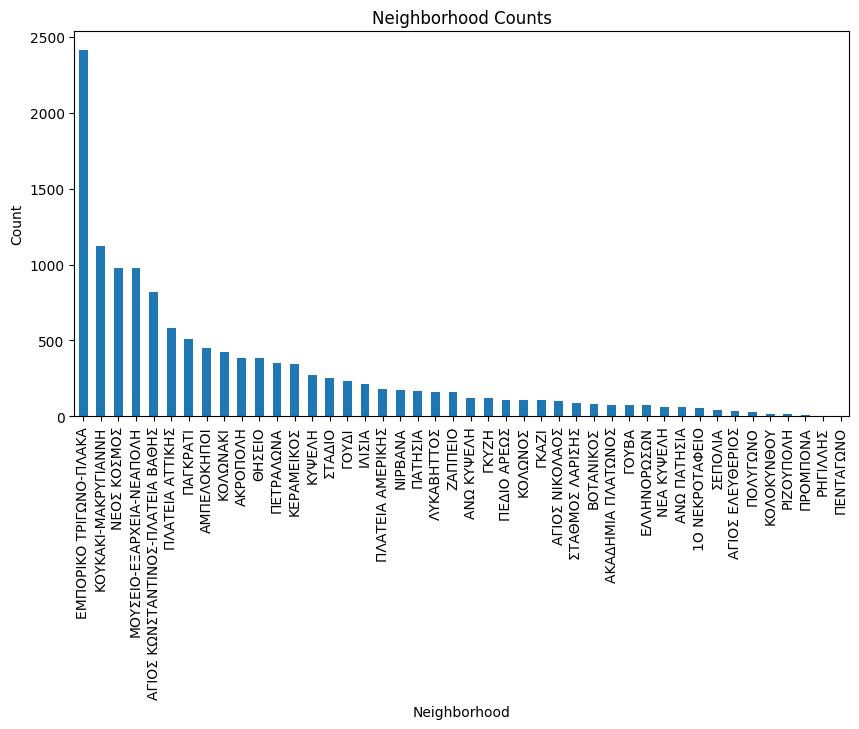

In [7]:
neighborhood_counts = listings['neighbourhood'].value_counts()
neighborhood_counts = neighborhood_counts.sort_values(ascending=False)#sort in a descending order

plt.figure(figsize=(10, 5))
neighborhood_counts.plot(kind='bar')
plt.title('Neighborhood Counts')
plt.xlabel('Neighborhood')
_ = plt.ylabel('Count')

* The plot itself seems alright, the data matches the trends of where people that use Airbnb may stay. However there are some problems:
1. The bigger areas skew our plot very much, and we don't get enough information for the rest of them.

2. Tilting our heads is not fun, so lets put the neighborhoods on the vertical axis.

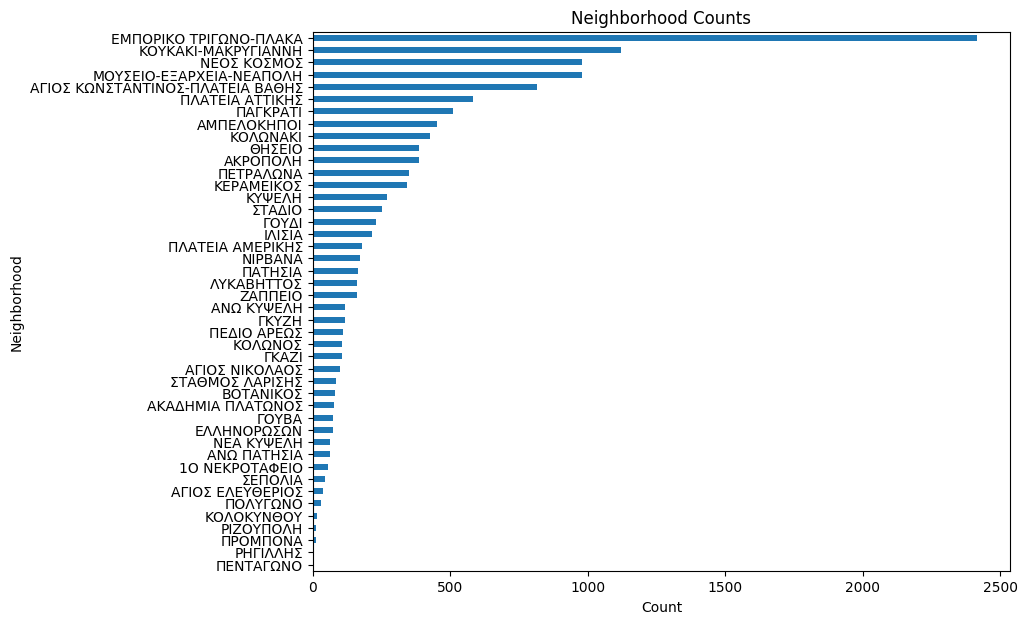

In [8]:
neighborhood_counts = neighborhood_counts.sort_values(ascending = True)#we sort ascending and flip the table, making it descending
plt.figure(figsize=(9, 7))
neighborhood_counts.plot(kind='barh')#barh instead of bar to flip the axes
plt.title('Neighborhood Counts')
plt.xlabel('Count')
_ = plt.ylabel('Neighborhood')

* Here is the above plot in table form 

In [57]:
neighborhood_counts.sort_values(ascending = False)


neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕ

* This plot is the one that depicts the truth in a more comfortable manner. 

* Removing whole neighborhoods from our graph isn't strictly speaking correct, so we're going to create a graph that shows the normalized data within the [interquantile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range).

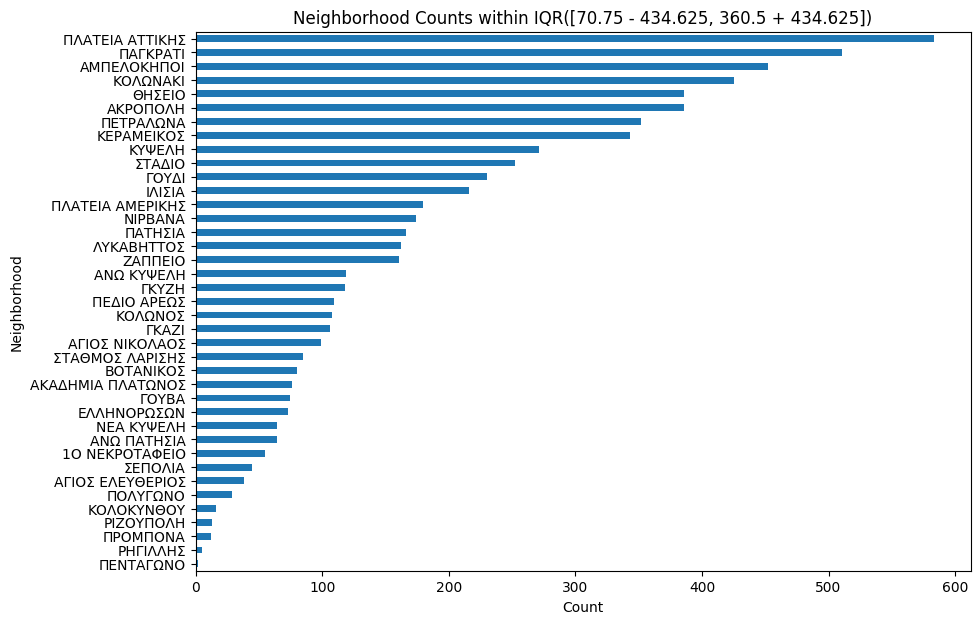

In [10]:
#find 25% and 75% quantiles
Q1 = neighborhood_counts.quantile(0.25)
Q3 = neighborhood_counts.quantile(0.75)
#calculate IQR
IQR = Q3 - Q1
#filter our data that falls between IQR requirements
filtered_neighborhood_counts = neighborhood_counts[(neighborhood_counts >= (Q1 - (1.5*IQR))) & (neighborhood_counts <= (Q3 + (1.5*IQR)))]
#create our plot
plt.figure(figsize=(10, 7))
filtered_neighborhood_counts.plot(kind='barh')
plt.title(f'Neighborhood Counts within IQR([{Q1} - {1.5*IQR}, {Q3} + {1.5*IQR}])')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
_ = plt.show()

* This graph seems to depict the difference among the other neighborhoods way more clearly.

## Neighbourhood Prices in Descending Order

>Create a table with the prices per neighbourhood. The prices information should contain:
>* median price per neighbourhood
>* mean price per neighbourhood
>* standard deviation per neighbourhood
>* number of listings per neighbourhood.
>The contents of the table should be in descending median prices.

* We can start off by taking a look at our price data to check that everything is in order

In [11]:
listings.describe()['price']

count    12955.000000
mean       110.458587
std        738.185656
min         10.000000
25%         50.000000
50%         71.000000
75%        113.000000
max      80275.000000
Name: price, dtype: float64

In [12]:
listings['price'].isnull().values.any()

False

* We need not fill `NaN` values since there are none.

* Judging from these 2 clues our data seems usable for visualisation. Let's go and do that to see what we find out.

* First we can see the distribution of the prices using a box-plot.

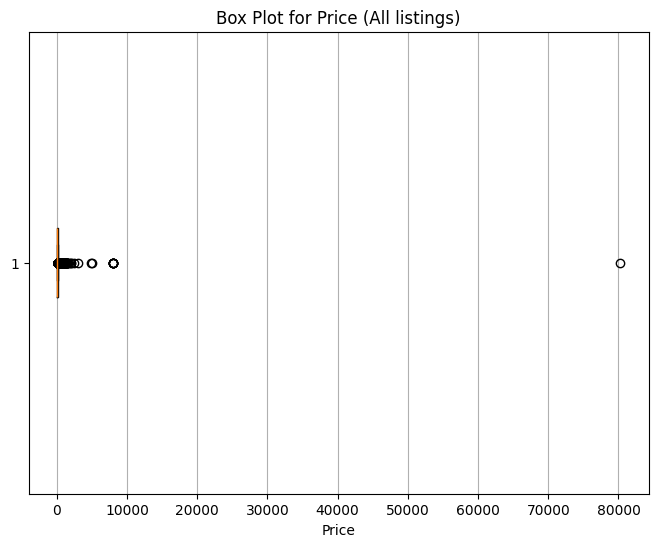

In [13]:
plt.figure(figsize=(8, 6)) 
plt.boxplot(listings['price'], vert=False)
plt.title('Box Plot for Price (All listings)')
plt.xlabel('Price')
plt.grid(axis='x')

* The outliers seem to skew our plots big time, so we should take a look without them.

* We shall focus on the first 80 percentiles. The lowest `25%` of data doesn't skew the plot, and the prices up to `80` seem reasonable.

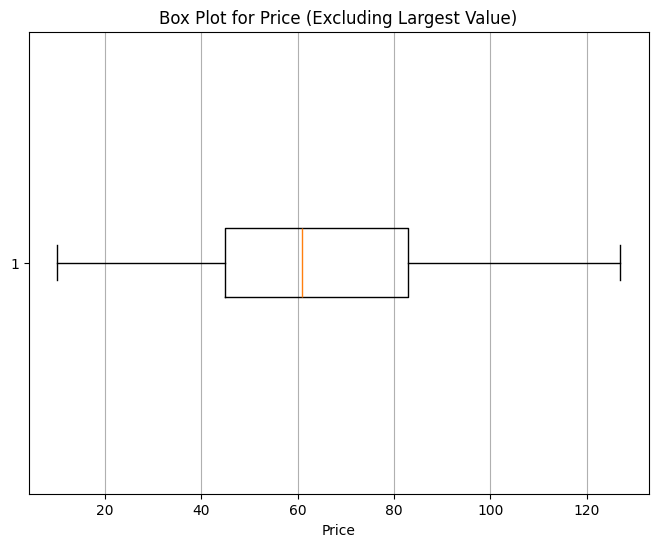

In [14]:
q3  = listings['price'].quantile(0.80)#the value for the 80th percentile

plt.figure(figsize=(8, 6))
plt.boxplot(listings['price'][listings['price'] < q3], vert=False)
plt.title('Box Plot for Price (Excluding Largest Value)')
plt.xlabel('Price')
plt.grid(axis='x')

plt.show()

* It may be more helpful to look at each neighborhood individually, since economic disparity between neighbourhood should mean different pricing for them. 

In [15]:
neighborhoods = listings['neighbourhood'].unique()
#dropdown menu
neighborhood_dropdown = widgets.Dropdown(
    options = neighborhoods,
    description = 'Select Listing:',
    value = 'ΝΕΑ ΚΥΨΕΛΗ'
)

#update chart upon user choice
def update_line_chart(neighborhood):
    plt.figure(figsize=(10, 6))
    plt.boxplot(listings['price'][listings['neighbourhood'] == neighborhood], vert=False, widths = 0.6)    
    plt.title("Distribution of price in {} (n = {})".format(neighborhood,listings[listings['neighbourhood'] == neighborhood].shape[0]))
    plt.xlabel("Price")
    plt.yticks(rotation=45)
    

#listen for user input
widgets.interactive(update_line_chart, neighborhood=neighborhood_dropdown)

interactive(children=(Dropdown(description='Select Listing:', index=6, options=('ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩ…

* The table that corresponds to the above plot(s) is this one:

In [16]:
neighborhood_stats = listings.groupby('neighbourhood').agg({'price': ['median', 'mean', 'std', 'count']})
neighborhood_stats.columns = ['Median Price', 'Mean Price', 'Standard Deviation', 'Number of Listings']
neighborhood_stats = neighborhood_stats.sort_values(by='Median Price', ascending=False)

neighborhood_stats.transpose()

neighbourhood,ΡΗΓΙΛΛΗΣ,ΖΑΠΠΕΙΟ,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,ΑΚΡΟΠΟΛΗ,ΚΟΛΩΝΑΚΙ,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,ΘΗΣΕΙΟ,ΚΕΡΑΜΕΙΚΟΣ,ΛΥΚΑΒΗΤΤΟΣ,ΓΚΑΖΙ,...,ΠΑΤΗΣΙΑ,ΠΟΛΥΓΩΝΟ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΓΚΥΖΗ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΡΙΖΟΥΠΟΛΗ,ΚΟΛΟΚΥΝΘΟΥ,ΝΙΡΒΑΝΑ,ΑΝΩ ΚΥΨΕΛΗ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
Median Price,120.000000,114.000000,104.000000,100.000000,100.000000,90.500000,90.000000,89.000000,75.000000,70.500000,...,45.000000,45.000000,45.000000,44.500000,44.000000,44.000000,43.000000,42.000000,42.000000,41.500000
Mean Price,367.800000,224.068323,140.650662,195.344560,128.595294,120.284314,126.492228,123.883382,104.561728,95.792453,...,60.524096,54.310345,53.202020,52.033898,52.500000,52.538462,43.937500,53.045977,45.932773,43.736842
Standard Deviation,578.622675,641.163173,229.183015,703.321565,104.431349,104.613533,124.176775,136.367487,87.859850,75.355882,...,117.601314,26.467100,32.861484,42.301913,37.479603,22.096815,9.532182,39.449070,23.316078,17.408734
Number of Listings,5.000000,161.000000,2416.000000,386.000000,425.000000,1122.000000,386.000000,343.000000,162.000000,106.000000,...,166.000000,29.000000,99.000000,118.000000,180.000000,13.000000,16.000000,174.000000,119.000000,38.000000


* This is very helpful for us to understand what goes on in each different neighbourhood.

* Lets take a look without the outliers as well though.

In [17]:
neighborhoods = listings['neighbourhood'].unique()
#dropdown
neighborhood_dropdown = widgets.Dropdown(
    options=neighborhoods,
    description='Select Neighborhood:',
    value='ΝΕΑ ΚΥΨΕΛΗ'
)
def update_box_plot(neighborhood):
    plt.figure(figsize=(10, 6))
    selected_data = listings['price'][listings['neighbourhood'] == neighborhood]
    percentile1 = np.percentile(selected_data, 1)
    percentile80 = np.percentile(selected_data, 80)
    filtered_data = selected_data[(selected_data >= percentile1) & (selected_data <= percentile80)]
    plt.boxplot(filtered_data, vert=False, widths=0.6)
    plt.title("Distribution of price in {} (n = {})".format(neighborhood, filtered_data.shape[0]))
    plt.xlabel("Price")
    plt.yticks(rotation=45)
    
widgets.interactive(update_box_plot, neighborhood=neighborhood_dropdown)
        

interactive(children=(Dropdown(description='Select Neighborhood:', index=6, options=('ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ …

* And the corresponding table:

In [18]:
#find 80th percentile of each neighborhood
def calculate_80th_percentile(group):
    percentile_80 = group['price'].quantile(0.8)
    return group[group['price'] <= percentile_80]

neighborhood_stats_80th = listings.groupby('neighbourhood').apply(calculate_80th_percentile)
neighborhood_stats_80th.reset_index(drop=True, inplace=True)#for ambiguity
neighborhood_stats_80th = neighborhood_stats_80th.groupby('neighbourhood').agg({'price': ['median', 'mean', 'std', 'count']})
neighborhood_stats_80th.columns = ['Median Price', 'Mean Price', 'Standard Deviation', 'Number of Listings']
neighborhood_stats_80th = neighborhood_stats_80th.sort_values(by='Median Price', ascending=False)

neighborhood_stats_80th.transpose()

neighbourhood,ΖΑΠΠΕΙΟ,ΡΗΓΙΛΛΗΣ,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,ΚΟΛΩΝΑΚΙ,ΑΚΡΟΠΟΛΗ,ΚΕΡΑΜΕΙΚΟΣ,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,ΘΗΣΕΙΟ,ΛΥΚΑΒΗΤΤΟΣ,ΓΚΑΖΙ,...,ΠΟΛΥΓΩΝΟ,ΓΚΥΖΗ,ΠΑΤΗΣΙΑ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΚΟΛΟΚΥΝΘΟΥ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΝΙΡΒΑΝΑ,ΑΝΩ ΚΥΨΕΛΗ,ΡΙΖΟΥΠΟΛΗ
Median Price,98.000000,96.000000,90.000000,87.000000,86.000000,81.000000,80.000000,79.000000,65.000000,64.000000,...,42.000000,41.000000,40.000000,40.000000,40.000000,40.000000,40.000000,39.000000,38.000000,37.500000
Mean Price,106.759690,109.750000,94.641860,91.533528,92.074434,83.098540,84.199554,84.883871,71.674419,67.470588,...,43.347826,40.531915,40.323308,36.933333,40.384615,40.388889,41.860759,39.366906,37.400000,42.800000
Standard Deviation,52.413139,49.735132,35.651978,35.259579,37.814194,31.360385,30.984574,32.615730,26.982970,21.253340,...,9.847052,10.601990,14.813768,12.202129,4.519190,10.878291,11.809095,10.586527,11.290553,12.470409
Number of Listings,129.000000,4.000000,1935.000000,343.000000,309.000000,274.000000,897.000000,310.000000,129.000000,85.000000,...,23.000000,94.000000,133.000000,30.000000,13.000000,144.000000,79.000000,139.000000,95.000000,10.000000


## Availability per Day

> Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

* We should first check our data to find out the timeframe they're set in

* We'll use the `calendar.gz.csv` file that contains the relevant information

In [19]:
calendar_gz = pd.read_csv('airbnb_data/calendar.csv.gz', 
                compression="gzip", header=0, sep=",", quotechar='"')
calendar_gz.tail(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
4728224,984289252638695828,2024-09-15,t,$18.00,$18.00,1,365
4728225,984289252638695828,2024-09-16,t,$16.00,$16.00,1,365
4728226,984289252638695828,2024-09-17,t,$16.00,$16.00,1,365
4728227,984289252638695828,2024-09-18,t,$16.00,$16.00,1,365
4728228,984289252638695828,2024-09-19,t,$16.00,$16.00,1,365


* We need to convert the `date` column to a datetime object in order to exctract information from it.

* While we're at it let's check the span of our data.

In [58]:
# Convert the "date" column to datetime to be able to make calculations
calendar_gz['date'] = pd.to_datetime(calendar_gz['date'])
print("Earliest Entry (Date):", calendar_gz['date'].min())
print("Latest Entry (Date):", calendar_gz['date'].max())


Earliest Entry (Date): 2023-09-21 00:00:00
Latest Entry (Date): 2024-09-19 00:00:00


* The data seems to span from September of this year to September of next year.

* Let's go ahead and create our plot.

* The [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=150111846) points out that the `available` column has 2 values, `t` for true and `f` for false.

* We should check if there are any other values in that column. 

In [21]:
calendar_gz['available'].unique()

array(['f', 't'], dtype=object)

* Our data is clean, we can go ahead and create our plot.

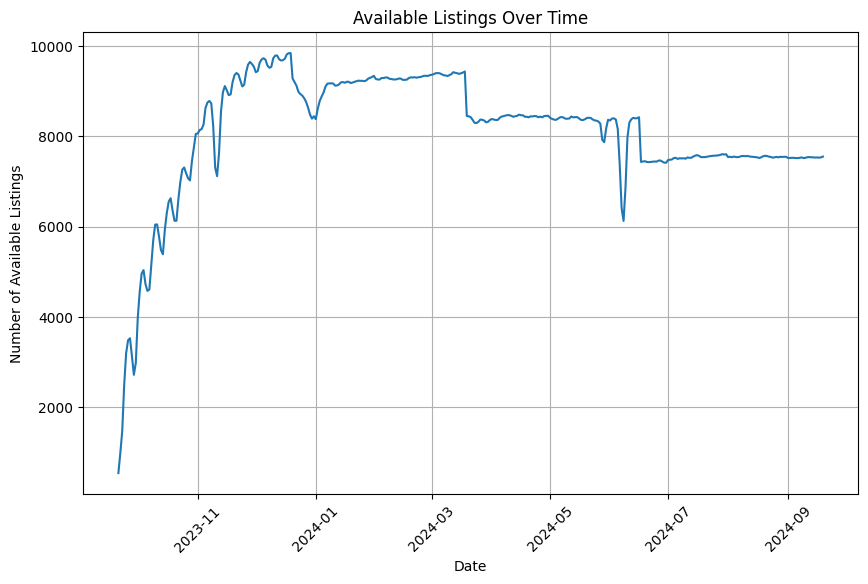

In [22]:
available_listings_data = calendar_gz[calendar_gz['available'] == 't']
available_listings_count = available_listings_data.groupby('date')['listing_id'].count()

plt.figure(figsize=(10, 6))
plt.plot(available_listings_count.index, available_listings_count.values)
plt.title("Available Listings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Available Listings")
plt.grid(True)
plt.xticks(rotation=45)

_ = plt.show()

* We can gather a lot of information from the occuring plot

1. There seems to be way more listings the closer we are to the date. That is so because usually people book their room close to the time they plan on arriving, so it makes sense for the availability to be lower the closer we are.

2. We can see dips in availability every week or so. Upon closer inspection through the dataset we can tell that theese are the weekends, when people tend to go for a retreat.

3. We can make out dates with a lot of traffic, like Nov. 17th (national holiday), Christmas Eve, and a huge dropdown in availability halfway through March (when the tourist season starts taking off). A huge dropdown can also be seen the week schools close (2nd week of June)

* We can take a look at the data per season, to have a closer look on the dates.

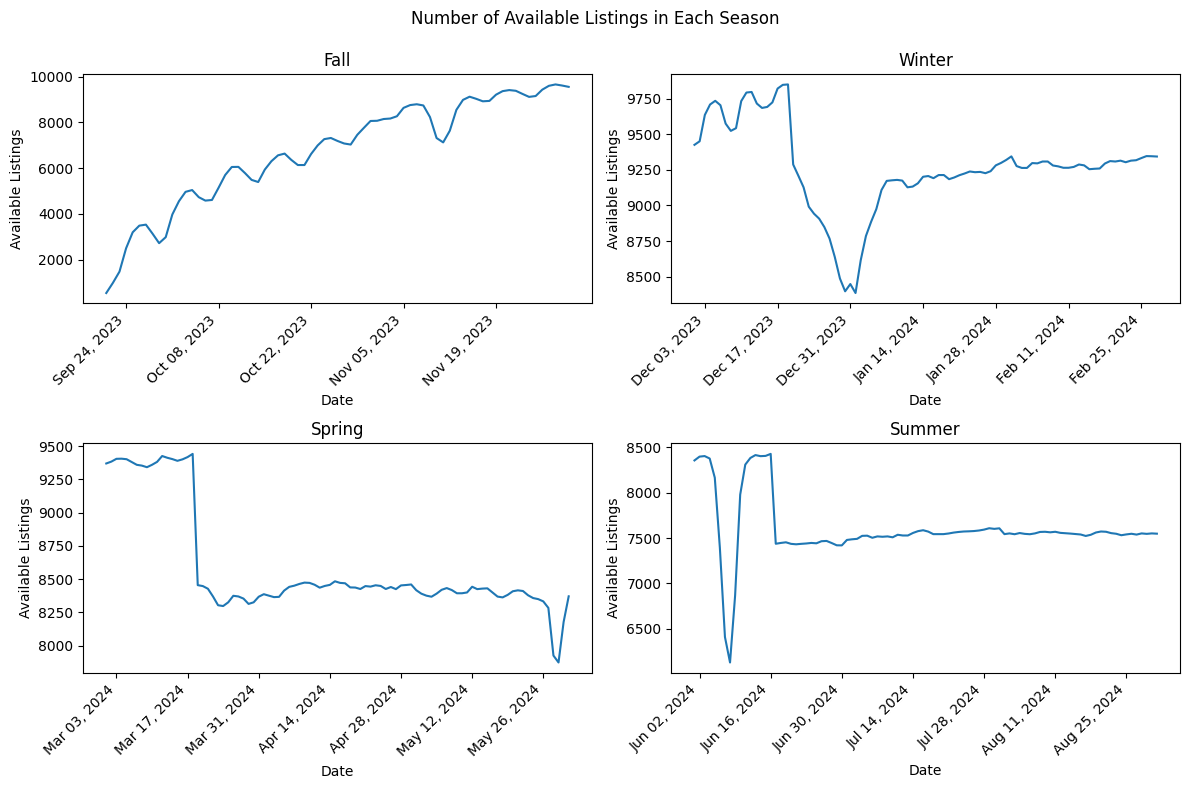

In [23]:
#set the span of each season
seasons = [
    ("Fall", pd.Timestamp(year=2023, month=9, day=21), pd.Timestamp(year=2023, month=11, day=30)),
    ("Winter", pd.Timestamp(year=2023, month=12, day=1), pd.Timestamp(year=2024, month=2, day=28)),
    ("Spring", pd.Timestamp(year=2024, month=3, day=1), pd.Timestamp(year=2024, month=5, day=31)),
    ("Summer", pd.Timestamp(year=2024, month=6, day=1), pd.Timestamp(year=2024, month=8, day=31))
]
#4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Number of Available Listings in Each Season")
date_format = DateFormatter("%b %d, %Y")#format like "Jan 01, 2023"
#create a subplot for each season
for i, (season_name, start_date, end_date) in enumerate(seasons):
    data = calendar_gz[(calendar_gz['date'] >= start_date) & (calendar_gz['date'] <= end_date)]
    available_listings = data[data['available'] == 't'].groupby('date')['listing_id'].count()
    ax = axs[i // 2, i % 2]
    ax.plot(available_listings.index, available_listings.values)
    ax.set_title(season_name)
    ax.set_xlabel("Date")
    ax.set_ylabel("Available Listings")
    ax.xaxis.set_major_formatter(date_format)
    #tick every 2 weeeks
    date_range = pd.date_range(start=start_date, end=end_date, freq='2W')
    ax.set_xticks(date_range)
    ax.set_xticklabels(date_range.strftime("%b %d, %Y"), rotation=45, ha="right")

plt.tight_layout()
plt.subplots_adjust(top=0.9)

_ = plt.show()

* This gives us a better understanding for each season, and points out the information we noted down earlier.

* But these plots can be misleading (for example without knowing better you could understand that Spring has less availability than Summer, which is not the case), so we should also view them side by side with the same axes.

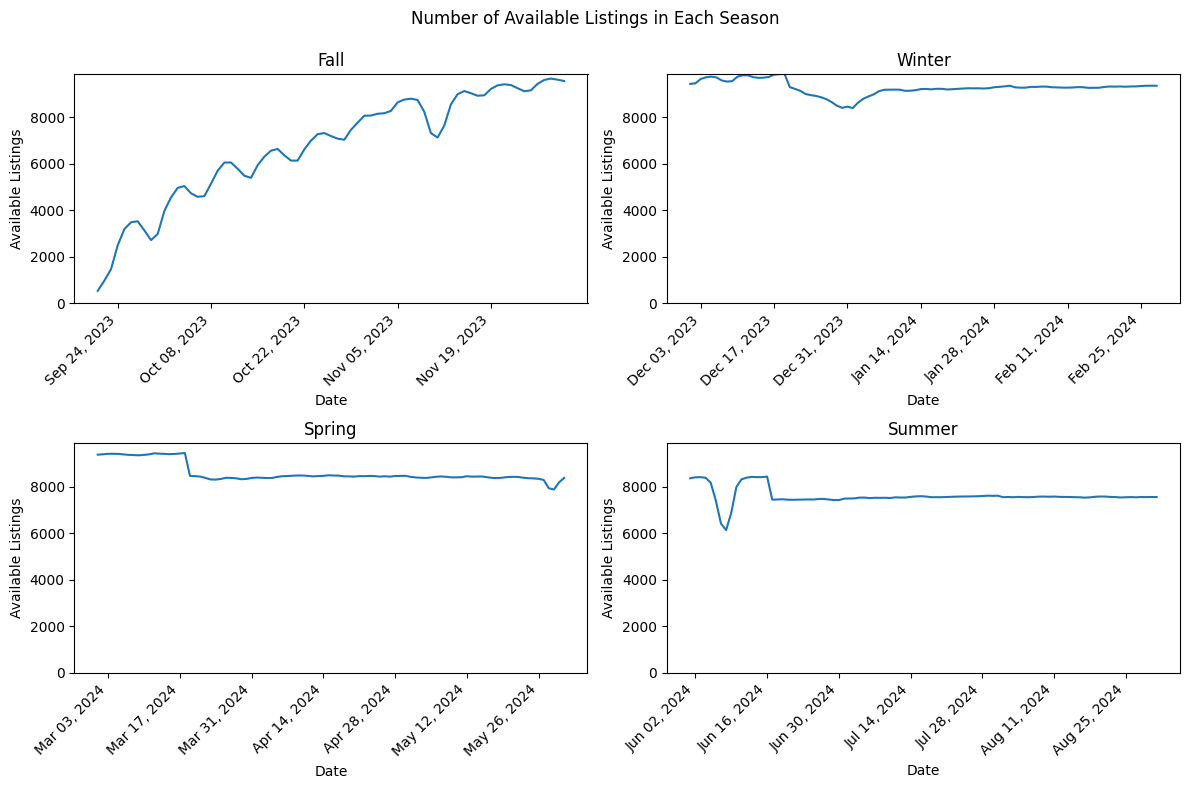

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Number of Available Listings in Each Season")
max_listings = 0
for i, (season_name, start_date, end_date) in enumerate(seasons):
    data = calendar_gz[(calendar_gz['date'] >= start_date) & (calendar_gz['date'] <= end_date)]
    available_listings = data[data['available'] == 't'].groupby('date')['listing_id'].count()
    max_listings = max(max_listings, available_listings.max())

    ax = axs[i // 2, i % 2]
    ax.plot(available_listings.index, available_listings.values)
    ax.set_title(season_name)
    ax.set_xlabel("Date")
    ax.set_ylabel("Available Listings")
    ax.xaxis.set_major_formatter(date_format)

    date_range = pd.date_range(start=start_date, end=end_date, freq='2W')
    ax.set_xticks(date_range)
    ax.set_xticklabels(date_range.strftime("%b %d, %Y"), rotation=45, ha="right")
#fix axes to the same values
for ax in axs.flat:
    ax.set_ylim(0, max_listings)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

_ = plt.show()

* This plot although not as aesthetically pleasing, gives a more truthful detailing of availability.

## Reviews, Occupacy per Listing, Average Income

>Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.


* We can use the `number_of_reviews` column from the `listings` dataset to find our answer.

* We should first take a look at the data to make sure it's usable.

In [25]:
listings['number_of_reviews'].describe()

count    12955.000000
mean        48.674489
std         83.281705
min          0.000000
25%          2.000000
50%         13.000000
75%         56.000000
max        865.000000
Name: number_of_reviews, dtype: float64

In [26]:
listings['number_of_reviews'].isnull().values.any()

False

* It seems good enough for us to use it for our purposes.

* Let's create the histogram.

* After trial and error we shall use custom bin edges, since `matplotlib` likes `[)` types of ranges which we don't.

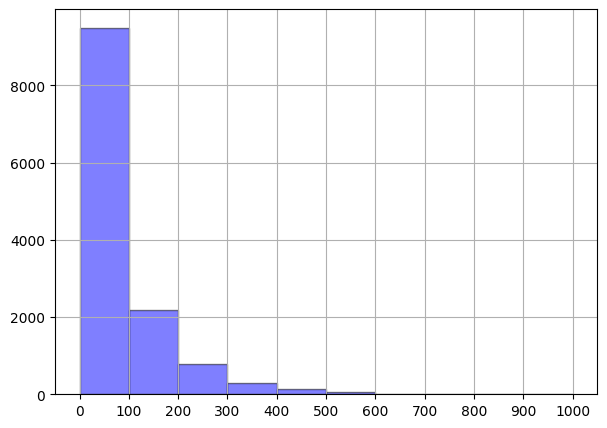

In [27]:
#round no of reviews to nearest 100 as instructed
rounded_reviews = listings['number_of_reviews'].apply(lambda x: round(x, -2))
#create our own bins
bin_edges = np.arange(min(rounded_reviews), max(rounded_reviews) + 101, 100)#custom bins
plt.xticks(bin_edges)
_ = rounded_reviews.hist(color='blue', edgecolor='black', alpha=0.5, 
                           figsize=(7, 5), bins = bin_edges)


* As we saw in the `describe` section, the data is heavily centered around the `0-100` mark, with at least `25%` of our data having `0-2` reviews which explains the look of our table.

* It doesn't harm to take a closer look without the `0-100` range to get more information on the rest of the ranges.

* Or even better than that, we can *zoom* in on command. Using the UI above the plot below, you can set the range being viewed to `[user__input,1000)`

In [28]:
#create the slider
range_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=900,
    step=100,
    description='Select range:'
)
def update_histogram(range_qt):
    plt.figure(figsize=(7, 5))
    filtered_data = rounded_reviews[rounded_reviews >= range_qt]
    plt.hist(filtered_data, bins=range(range_qt, 1001, 100), color='blue', edgecolor='black', alpha=0.5)
    plt.xlabel('Number of reviews')
    plt.ylabel('No. of Listings')
    plt.title('Number of reviews per Listing')
    plt.xticks(np.arange(range_qt, 1001, 100))#set ticks manually
    plt.show()

widgets.interactive(update_histogram, range_qt=range_slider)


interactive(children=(IntSlider(value=0, description='Select range:', max=900, step=100), Output()), _dom_clas…

* Now we have a good idea of the distribution of reviews 

>Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

* We would like to find out what the average ocupacy would be in a month for a listing in Athens.

* First we should find out, on average, how many reviews a listing gets per month.

* The `reviews_per_month` column describes , per listing, how many reviews the listing gets per month on average.

* So the average of the `reviews_per_month` shows, on average, the average reviews of a listing.

In [59]:
average_reviews_per_month = listings['reviews_per_month'].mean()
average_reviews_per_month

1.795771433766706

* We know that a listing gets on average `1.79` reviews per month. 

* Following the convention that half of bookings result in reviews we get:

In [60]:
average_ocupacy_per_month = average_reviews_per_month * 2
average_ocupacy_per_month

3.591542867533412

* The average ocupacy per listing per month is `3.59` bookings per month.

>Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

* First we need the average price throughout all listings.

In [61]:
mean_price = listings['price'].mean()
mean_price

110.45858741798533

* Then we can calculate the average income per month.

In [62]:
average_income_per_month = mean_price * 3 * average_ocupacy_per_month
average_income_per_month

1190.1502553966432

* So the average listing makes about `1190$` per month.

## Listings per Room Type

>Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

* We should take a look at how many unique room types there are:

In [39]:
listings['room_type'].unique().tolist()

['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']

* There are only 4, with no false/wrong values we need to clear through.

* Now we can view the absolute numbers.

In [40]:
listings['room_type'].value_counts()

room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64

* And as a percentage.

In [41]:
sum_of_rooms = listings['id'].count()#number of listings
listings['room_type'].value_counts() / sum_of_rooms

room_type
Entire home/apt    0.899421
Private room       0.085913
Hotel room         0.008105
Shared room        0.006561
Name: count, dtype: float64

* And per neighborhood, we just group by neighborhood.

In [63]:
room_type_counts = listings.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
room_type_counts.transpose()

neighbourhood,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,ΑΚΡΟΠΟΛΗ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΝΩ ΚΥΨΕΛΗ,ΑΝΩ ΠΑΤΗΣΙΑ,ΒΟΤΑΝΙΚΟΣ,...,ΠΕΤΡΑΛΩΝΑ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,ΠΟΛΥΓΩΝΟ,ΠΡΟΜΠΟΝΑ,ΡΗΓΙΛΛΗΣ,ΡΙΖΟΥΠΟΛΗ,ΣΕΠΟΛΙΑ,ΣΤΑΔΙΟ,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,55,33,686,91,74,360,431,103,61,73,...,339,158,501,28,11,5,10,41,241,73
Hotel room,0,0,4,0,0,6,0,0,0,0,...,2,0,0,0,0,0,0,0,0,4
Private room,0,5,117,8,2,20,17,16,3,7,...,10,22,77,0,1,0,3,4,11,4
Shared room,0,0,10,0,0,0,4,0,0,0,...,1,0,5,1,0,0,0,0,0,4


* We can depict the distribution for each neighborhood.
* You may use the dropdown to pick for which category you'd like to see the distribution of.

In [43]:
def update_histogram(neighborhood):
    data = room_type_counts.loc[neighborhood]
    data.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
    plt.title(f'Room Type Distribution in {neighborhood}')
    plt.xlabel('Room Type')
    plt.ylabel('Count')

    for i, v in enumerate(data):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

# Create a dropdown widget for selecting the neighborhood
neighborhood_dropdown = widgets.Dropdown(
    options=room_type_counts.index,
    description='Neighborhood:',
    value = 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ'
)

# Create an interactive widget
widgets.interactive(update_histogram, neighborhood=neighborhood_dropdown)

interactive(children=(Dropdown(description='Neighborhood:', index=43, options=('1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΑΓΙΟΣ ΕΛΕΥΘΕ…

## Prices per Day

> Create a table with the average price per listing per day. Draw a graph visualizing the table.

* For this purpose we'll use the `calendar.csv.gz` file that contains information for the price of each listing per day.

* The [data dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=150111846) does not specify where `adjusted price` comes from, so we'll use the `price` column for our purposes, since that's the actual price of the listing.

* We can see that the `price` column is actually in `str` format, so we should fix it before we go ahead.

* We'll make a copy of our data beforehand so we dont mess with the original data.

In [44]:
calendar_copy = calendar_gz.copy()
calendar_copy['price'] = calendar_copy['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_copy['date'] = pd.to_datetime(calendar_copy['date'])
calendar_copy

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,150.0,$60.00,1,180
1,10595,2023-09-22,t,150.0,$60.00,1,180
2,10595,2023-09-23,t,150.0,$75.00,1,180
3,10595,2023-09-24,t,150.0,$90.00,1,180
4,10595,2023-09-25,f,300.0,$210.00,1,180
...,...,...,...,...,...,...,...
4728224,984289252638695828,2024-09-15,t,18.0,$18.00,1,365
4728225,984289252638695828,2024-09-16,t,16.0,$16.00,1,365
4728226,984289252638695828,2024-09-17,t,16.0,$16.00,1,365
4728227,984289252638695828,2024-09-18,t,16.0,$16.00,1,365


* Now that we're able to do math with the price we can calculate what we need.

In [45]:
average_price_by_date = calendar_copy.groupby('date')['price'].mean()

average_price_by_date

date
2023-09-21    113.107689
2023-09-22    116.212290
2023-09-23    116.264860
2023-09-24    113.045932
2023-09-25    111.629226
                 ...    
2024-09-15    110.923736
2024-09-16    110.402933
2024-09-17    110.385488
2024-09-18    110.298572
2024-09-19    110.255577
Name: price, Length: 365, dtype: float64

* Visualised:

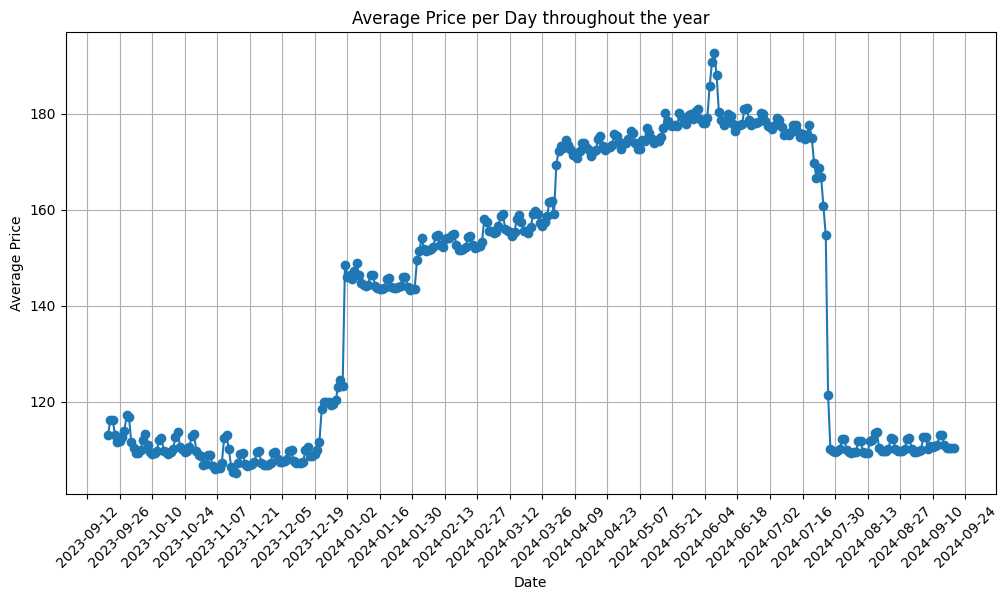

In [46]:
plt.figure(figsize=(12, 6))

plt.plot(average_price_by_date.index, average_price_by_date, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price per Day throughout the year')
plt.xticks(rotation=45)

#ticks every 2 weeks
weeks = mdates.WeekdayLocator(interval=2)
ax = plt.gca()
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Customize the date format as needed.

plt.grid(True)
plt.show()

* There is a lot of information to be found in this graph.

* The prices after the midway of September are low after the summer season ends.

* Then we see a jump on prices at the start of December, when people may go on winter vacation.

* The prices stay on that level and slowly rise, until mid march when they jump up to meet the demand for the summer season.

* After the summer season ends, the prices fall back to where they were on September.

* We should also take a look without the outliers, using IQR once again.

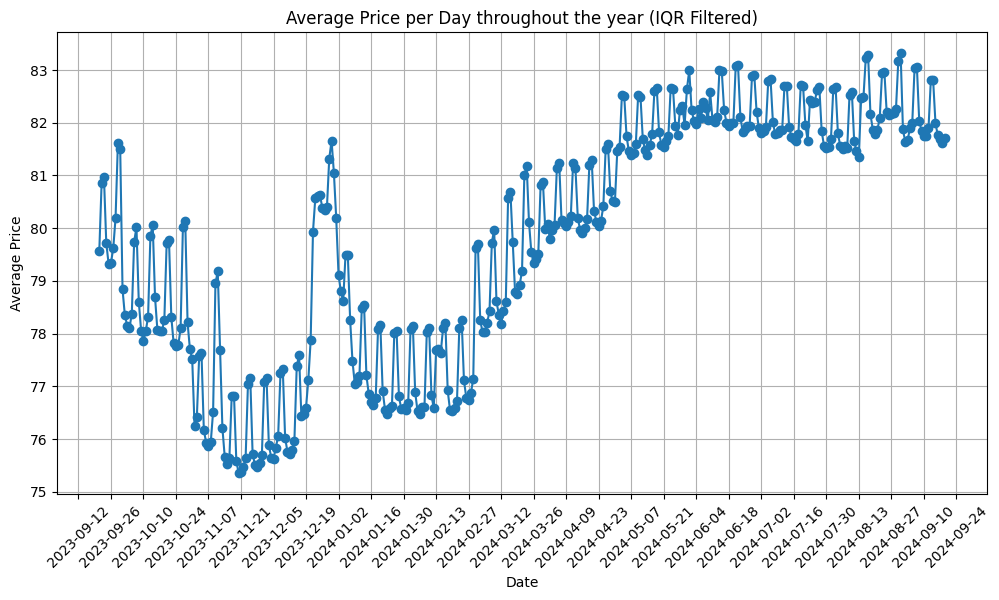

In [64]:
q1 = calendar_copy['price'].quantile(0.25)
q3 = calendar_copy['price'].quantile(0.75)
iqr = q3 - q1
#keep data only between [q1-1.5iqr, q3+1.5iqr]
filtered_data = calendar_copy[(calendar_copy['price'] >= (q1 - 1.5 * iqr)) & (calendar_copy['price'] <= (q3 + 1.5 * iqr))]
average_price_by_date_filtered = filtered_data.groupby('date')['price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_price_by_date_filtered.index, average_price_by_date_filtered, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price per Day throughout the year (IQR Filtered)')
plt.xticks(rotation=45)
# Set ticks every 2 weeks
weeks = mdates.WeekdayLocator(interval=2)
ax = plt.gca()
ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))#format YYYY-MM-DD

plt.grid(True)
plt.show()

* The picture painted here is very interesting. 

* We can see that the fluctuations on the price of the average listing are very small, comparatively to what we saw above.

In [65]:
total_data_points_before_filtering = len(calendar_copy)
total_data_points_after_filtering = len(filtered_data)
percentage_filtered_out = ((total_data_points_before_filtering - total_data_points_after_filtering) / total_data_points_before_filtering) * 100
percentage_filtered_out

7.389743601674114

* IQR filtered out `7.38%` of our data but we can see that the variance went from `[100,200]` to `[75, 83]`.

* We can also see that the seasonal markups are not as present here as they were in the unfiltered dataset.

* We can deduce that fluctuation in prices is mostly driven by the more expensive listings run by agencies, whereas the average host does not change their price often.

## Listings per Host

>Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:
>* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.
>* On the $y$ axis you will have the number of listings.

>That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

>After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

* We draw our data form the `listings.csv` file.

In [48]:
host_listings_count = listings['host_id'].value_counts().reset_index()
host_listings_count.columns = ['host_id', 'listings_count']
host_listings_count = host_listings_count.sort_values(by='listings_count', ascending=False)
host_listings_count['rank'] = range(1, len(host_listings_count) + 1)

host_listings_count

,host_id,listings_count,rank
0,20104194,114,1
1,113548208,88,2
2,90390850,78,3
3,748818,74,4
4,47267002,61,5
...,...,...,...
3032,46490655,1,5770
3033,70507227,1,5771
3034,93116996,1,5772
3035,490569700,1,5773


* We can't get a clear view of the data in this format, so again we should be able to zoom in/out.  

* The following graph contains the ranking of each host based of the number of listings they have. On the x axis you can see the ranking of the host, and on the y axis you can see the number of listings that host has.

* The Slider lets the user decide the range to be viewed. The range is set to `[user_input, number_of_hosts)`

In [66]:
#update on user input
def update_scatter(range_qt):
    plt.figure(figsize=(10, 6))
    filtered_data = host_listings_count[host_listings_count['rank'] >= range_qt]
    #alpha for opaqueness
    alpha = 0.2 + (filtered_data['listings_count'] / filtered_data['listings_count'].max()) * 0.8
    plt.scatter(filtered_data['rank'], filtered_data['listings_count'], c='skyblue', marker='o', alpha=alpha)
    plt.xlabel('Host Ranking (Based on Number of Listings)')
    plt.ylabel('Number of Listings')
    plt.title('Distribution of Listings per Host')
    plt.ylim(0, filtered_data['listings_count'].max() + 1)#refresh y axis
    plt.xticks(np.arange(0, len(filtered_data) + 1, 400))
    
    plt.show()
#slider
range_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=1000,
    step=50,
    description='Select range:'
)
widgets.interactive(update_scatter, range_qt=range_slider)

interactive(children=(IntSlider(value=0, description='Select range:', max=1000, step=50), Output()), _dom_clas…

* We can't tell a lot about our data in this format, even with zooming.

* Since the distribution since inverse logarithmic in shape, we can use a logarithmic x axis to get a better idea.

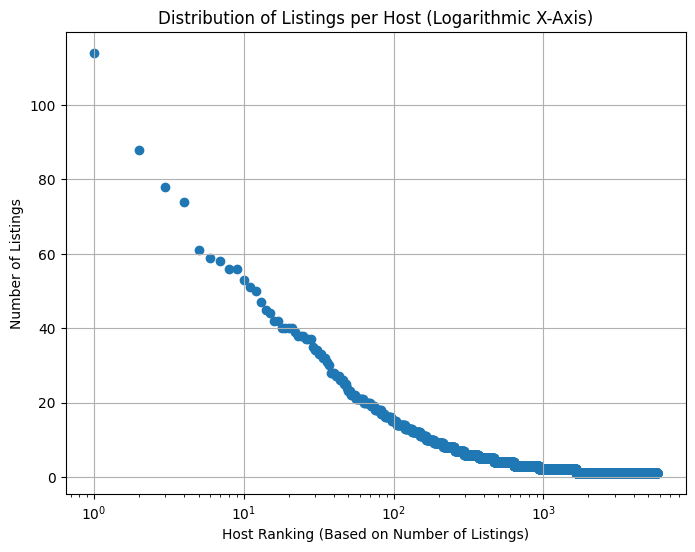

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(x=host_listings_count['rank'], y=host_listings_count['listings_count'])
plt.xscale('log')
plt.xlabel('Host Ranking (Based on Number of Listings)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings per Host (Logarithmic X-Axis)')
plt.grid(True)

plt.show()

* We can see something almost like a line with a slope on the logarithmic transformation.

* That's indicative of 2 groups of hosts.
1. One with high variability in listings and low variability in ranking.
2. One with high variabilty in ranking and low variability in listings.

* Thats due to the fact that most of the hosts do not own more that 2-3 listings. The average host has `2.3 ≈ 2` listings which is where the sum of hosts are located. The slope of the line from there and backwards starts changing rapidly.

## Visualize Listings

>Draw an interactive map to show the listings ovelayed on Athens.

>You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

>The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

>Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

>Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

* First we should create our map.

* The final product will be too heavy for our notebook so it will be included in a `.html` file, but we can draw a map of our neighbourhoods for refrence.

* For that purpose we can access the `neighourhoods.geojson` file included in the dataset.

In [51]:
#create the original map
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start = 13
                        , min_zoom = 13, max_zoom = 15)
neighborhoods_geojson = 'airbnb_data/neighbourhoods.geojson'
#set different colors for different neighborhoods
def get_color(feature):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown']
    return colors[len(feature['properties']['neighbourhood']) % len(colors)]
#create geojson layer
folium.GeoJson(
    neighborhoods_geojson,
    name='Neighborhoods',
    style_function=lambda feature: {
        'fillColor': get_color(feature),
        'fillOpacity': 0.4,
        'color': 'black',
        'weight': 1,
    },
    highlight_function=lambda x: {'weight': 3, 'color': 'black'},
    smooth_factor=2.0,
    tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood'], labels=True, sticky=True)
).add_to(athens_map)

athens_map

* This is the area we're working with.

* For displaying the listings we're going to use the `listings.csv.gz` file that contains the relevant information for our purposes (the simple `listings.csv` does not contain descriptions).

* Let's go ahead and read it.

In [52]:
listings_gz = pd.read_csv('airbnb_data/listings.csv.gz', 
                compression="gzip", header=0, sep=",", quotechar='"')
listings_gz.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20230921043851,2023-09-21,city scrape,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,The apartment is 3-bedroom apartment with 2-ba...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,...,4.88,4.60,4.74,00000957568,t,7,7,0,0,0.28
1,10990,https://www.airbnb.com/rooms/10990,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,...,4.89,4.78,4.75,00001070920,t,7,7,0,0,0.49
2,10993,https://www.airbnb.com/rooms/10993,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.84 · Studio · 2 bed...,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,...,4.98,4.82,4.79,00000957080,t,7,7,0,0,0.69
3,10995,https://www.airbnb.com/rooms/10995,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 2 ...,"AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,...,4.90,4.82,4.79,00000957422,t,7,7,0,0,0.19
4,724485,https://www.airbnb.com/rooms/724485,20230921043851,2023-09-21,city scrape,Rental unit in Athens · ★4.80 · 1 bedroom · 1 ...,"Value for money in an central but not ""tourist...",Opposite the building is one of Athens main pa...,https://a0.muscache.com/pictures/miso/Hosting-...,3745284,...,4.98,4.66,4.88,00000564690,t,2,2,0,0,3.87


* First we should create our map.

* After trial and error i decided that the best approach would be to cluster the listings by distance, and have them seperate as you zoom in.

* Thats because when i created the map with all listings visible it was very, *very* slow.

* So we cluster our data.

In [69]:
athens_map = folium.Map(location=[37.9838, 23.7275], zoom_start=14, min_zoom=14, max_zoom=20)
marker_cluster = MarkerCluster(threshold=30).add_to(athens_map)

* We don't limit our zoom to `15` as suggested, because then many listings that are close to each other don't appear at their correct location.

* We go ahead and format the presentation of our data.

In [70]:
for index, row in listings_gz.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    #format our data
    listing_name = row['name'].split(' · ')[0]
    rating = row['name'].split(' · ')[1]
    property_info = row['name'].split(' · ')[2]
    accommodates = row['accommodates']
    beds = row['beds']
    baths = row['bathrooms_text']
    neighborhood = row['neighbourhood_cleansed']
    price = row['price']

    #format for appearance on HTML
    popup_html = f"""
    <strong>{listing_name}</strong><br>
    Rating: {rating}<br><br>
    Type: {property_info}<br>
    Accommodates: {accommodates}<br>
    Beds: {beds}<br>
    {baths}<br><br>
    
    Neighborhood: {neighborhood}<br>
    Price: {price}
    """
    popup = folium.Popup(html=popup_html, max_width=300)
    folium.Marker([lat, lon], popup=popup).add_to(marker_cluster)
#save the map as seperate file
athens_map.save("athens_listings_map.html")


* The output file is included in the `.zip` file handed to the lecturer. 

* You can have th result by running the code and opening the resulting file in any browser.